In [1]:
import pandas as pd
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from umap import UMAP
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

2024-03-18 17:05:29.601023: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
labels_mappings_filtered = pd.read_csv("../../../processed_galaxy_data/processed_galaxy_data/labels_mappings_filtered.csv")
flattened_normalized_images = pd.read_csv("../../../processed_galaxy_data/processed_galaxy_data/flattened_normalized_images.csv", header=None)

In [3]:
print(f"{os.path.getsize('../../../processed_galaxy_data/processed_galaxy_data/labels_mappings_filtered.csv')} bytes")
print(f"{os.path.getsize('../../../processed_galaxy_data/processed_galaxy_data/flattened_normalized_images.csv')} bytes")

6899638 bytes
14973552073 bytes


In [4]:
labels_mappings_filtered

,objid,asset_id,shape_label
0,587722981741363294,3,S
1,587722981741363323,4,S
2,587722981741559888,5,E
3,587722981741625481,6,S
4,587722981741625484,7,S
...,...,...,...
239568,588015510368681992,295294,SB
239569,588015510368682105,295295,E
239570,588015510368682132,295296,E
239571,588015510636265643,295304,S


In [5]:
flattened_normalized_images

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0.027451,0.019608,0.015686,0.023529,0.035294,0.035294,0.023529,0.007843,0.019608,0.019608,...,0.039216,0.031373,0.023529,0.019608,0.023529,0.023529,0.019608,0.015686,0.007843,0.007843
1,0.043137,0.027451,0.011765,0.011765,0.019608,0.023529,0.015686,0.003922,0.007843,0.043137,...,0.007843,0.019608,0.035294,0.039216,0.031373,0.015686,0.003922,0.000000,0.015686,0.015686
2,0.137255,0.058824,0.003922,0.011765,0.027451,0.011765,0.007843,0.019608,0.023529,0.031373,...,0.066667,0.062745,0.066667,0.078431,0.070588,0.070588,0.090196,0.121569,0.094118,0.094118
3,0.007843,0.011765,0.015686,0.015686,0.007843,0.003922,0.011765,0.015686,0.015686,0.011765,...,0.003922,0.015686,0.023529,0.023529,0.019608,0.011765,0.011765,0.015686,0.011765,0.011765
4,0.000000,0.011765,0.019608,0.007843,0.003922,0.015686,0.023529,0.015686,0.007843,0.035294,...,0.043137,0.015686,0.027451,0.039216,0.031373,0.058824,0.098039,0.094118,0.109804,0.117647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239568,0.035294,0.027451,0.015686,0.007843,0.007843,0.011765,0.019608,0.027451,0.023529,0.023529,...,0.015686,0.019608,0.027451,0.027451,0.019608,0.019608,0.027451,0.031373,0.023529,0.027451
239569,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,0.031373,0.054902,0.047059,...,0.031373,0.023529,0.019608,0.019608,0.019608,0.019608,0.011765,0.007843,0.019608,0.019608
239570,0.027451,0.047059,0.039216,0.011765,0.023529,0.062745,0.058824,0.019608,0.023529,0.023529,...,0.015686,0.019608,0.019608,0.011765,0.007843,0.007843,0.015686,0.027451,0.031373,0.031373
239571,0.000000,0.000000,0.019608,0.031373,0.019608,0.003922,0.015686,0.043137,0.003922,0.062745,...,0.047059,0.039216,0.023529,0.015686,0.015686,0.023529,0.039216,0.047059,0.023529,0.015686


In [6]:
pca = PCA(n_components=35)
fni_reduced_pca = pca.fit_transform(flattened_normalized_images)

In [8]:
dbscan = DBSCAN(eps=0.05,min_samples=20)

In [9]:
clusters_fni_dbscan = dbscan.fit_predict(fni_reduced_pca)

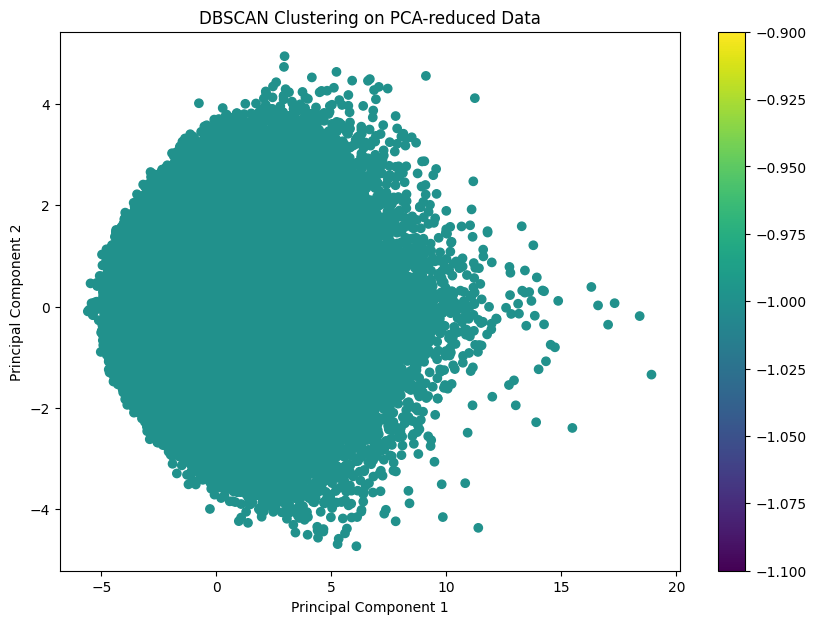

In [10]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(fni_reduced_pca[:, 0], fni_reduced_pca[:, 1], c=clusters_fni_dbscan, cmap='viridis')

plt.colorbar(scatter)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering on PCA-reduced Data')

plt.show()

In [12]:
dbscan = DBSCAN(eps=0.01,min_samples=5)

In [13]:
clusters_fni_dbscan = dbscan.fit_predict(fni_reduced_pca)

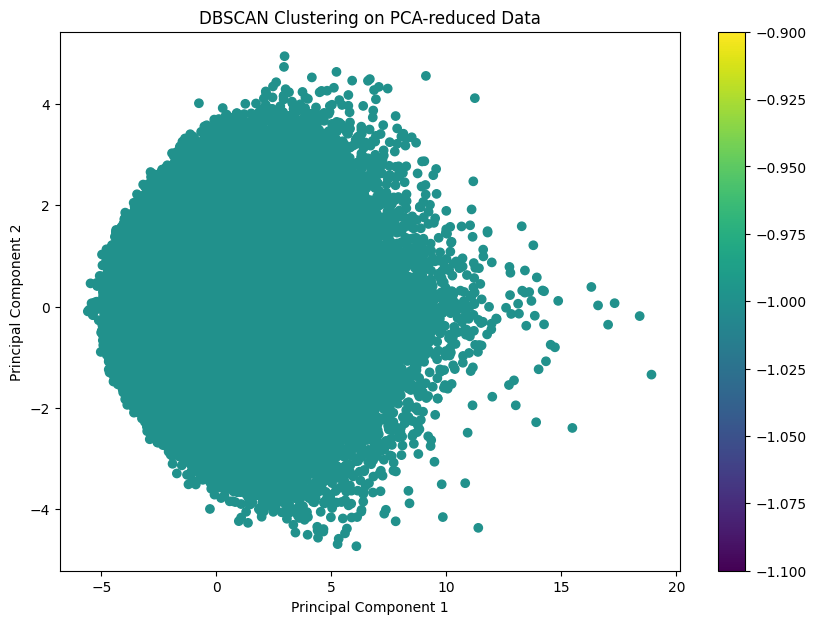

In [14]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(fni_reduced_pca[:, 0], fni_reduced_pca[:, 1], c=clusters_fni_dbscan, cmap='viridis')

plt.colorbar(scatter)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering on PCA-reduced Data')

plt.show()